## Austo Automobile : Data Analysis ##

## Data Overview


***Import Libraries***


In [1]:
import pandas as pd
import numpy as np

***Load Data***


In [4]:
file_path = "austo_automobile .csv"  
data = pd.read_csv(file_path)

***Structure of the data***

In [8]:
print("Structure of the data:")
print(data.head())  #First 5 rows
print("\nColumn Names:")
print(data.columns) 
print("\nData Shape:")
print("Number of rows = ",data.shape[0])
print("Number of columns = ",data.shape[1])


Structure of the data:
   Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2  

***Types of data***


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [11]:
print("Types of data:")
print(data.dtypes)

Types of data:
Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents      int64
Personal_loan        object
House_loan           object
Partner_working      object
Salary                int64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object


***Missing values***

In [13]:
print("Missing Values:") #missing values in each column
print(data.isnull().sum())

Missing Values:
Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [6]:
data.duplicated().sum()

0

In [15]:
data['Gender']=data['Gender'].fillna("Unknown") #fill null values with "Unknown"
print(data['Gender'].isnull().sum())


0


In [16]:
data.loc[(data['Partner_salary'].isnull()) & (data['Partner_working'] == 'No'), 'Partner_salary'] = 0 #for non working partners

mean_partner_salary = data['Partner_salary'].mean()
data['Partner_salary']=data['Partner_salary'].fillna(data['Total_salary']-data['Salary']) #for working partners

print(data['Partner_salary'].isnull().sum())


0


***Statistical Summary***

In [18]:
print("Statistical Summary:")
print(data.describe(include='number'))

Statistical Summary:
               Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1581.000000   
mean     31.922201          2.457938  60392.220114    19233.776091   
std       8.425978          0.943483  14674.825044    19670.391171   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    25100.000000   
75%      38.000000          3.000000  71800.000000    38100.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000.000000  


***Data irregularities***

In [20]:
for col in data.select_dtypes(include=np.number).columns:
    if (data[col] < 0).any():
        print(f"Column {col} has negative values.")
        data[col] = data[col].apply(lambda x: max(x, 0))  #replace negative values with 0
    else:
        print(f"Column {col} has no negative values.")
        

Column Age has no negative values.
Column No_of_Dependents has no negative values.
Column Salary has no negative values.
Column Partner_salary has no negative values.
Column Total_salary has no negative values.
Column Price has no negative values.


In [21]:
for col in data.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in Gender: ['Male' 'Femal' 'Female' 'Unknown' 'Femle']
Unique values in Profession: ['Business' 'Salaried']
Unique values in Marital_status: ['Married' 'Single']
Unique values in Education: ['Post Graduate' 'Graduate']
Unique values in Personal_loan: ['No' 'Yes']
Unique values in House_loan: ['No' 'Yes']
Unique values in Partner_working: ['Yes' 'No']
Unique values in Make: ['SUV' 'Sedan' 'Hatchback']


In [22]:
data['Gender'] = data['Gender'].replace({
    'Femal': 'Female',
    'Femle': 'Female',
    })

print("Unique values in 'Gender' column:", data['Gender'].unique())


Unique values in 'Gender' column: ['Male' 'Female' 'Unknown']


***Observations and Insights***

In [24]:
print("Observations:\n")
print(f"Total rows: {data.shape[0]}")
print(f"Total columns: {data.shape[1]}")
print("Columns with null values:")
print(data.isnull().sum())

print("\nInsights:\n")
print("Missing values in 'Gender' column were replaced with 'Unknown'.")
print("Missing values in 'Partner_salary' column were replaced with '0' for non-working partners and with mean of 'Partner_salary' for working partners.")
print("Negative values were replaced with 0 and spellings were corrected in 'Gender' column.")
print("Average salary is $",data['Salary'].mean())
print("Average partner_salary is $",data['Partner_salary'].mean())
print("Average total_salary is $",data['Total_salary'].mean())
gender_percentage = data['Gender'].value_counts(normalize=True) * 100
print("\nGender Percentage Distribution:\n", gender_percentage)
marital_status_percentage=data['Marital_status'].value_counts(normalize=True)*100
print("\nMarital Status percentage:\n",marital_status_percentage)
car_make_percentage=data['Make'].value_counts(normalize=True)*100
print("\nCar type percentage:\n",car_make_percentage)


Observations:

Total rows: 1581
Total columns: 14
Columns with null values:
Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

Insights:

Missing values in 'Gender' column were replaced with 'Unknown'.
Missing values in 'Partner_salary' column were replaced with '0' for non-working partners and with mean of 'Partner_salary' for working partners.
Negative values were replaced with 0 and spellings were corrected in 'Gender' column.
Average salary is $ 60392.220113851996
Average partner_salary is $ 19233.776091081592
Average total_salary is $ 79625.99620493359

Gender Percentage Distribution:
 Gender
Male       75.838077
Female     20.809614
Unknown     3.352309
Name: proportion, dtype: float64

Marital Status percentage:


## Univariate Analysis

***Numerical variables***


In [27]:
print("Numerical Variables:")
print(data.describe())

Numerical Variables:
               Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1581.000000   
mean     31.922201          2.457938  60392.220114    19233.776091   
std       8.425978          0.943483  14674.825044    19670.391171   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    25100.000000   
75%      38.000000          3.000000  71800.000000    38100.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000.000000  


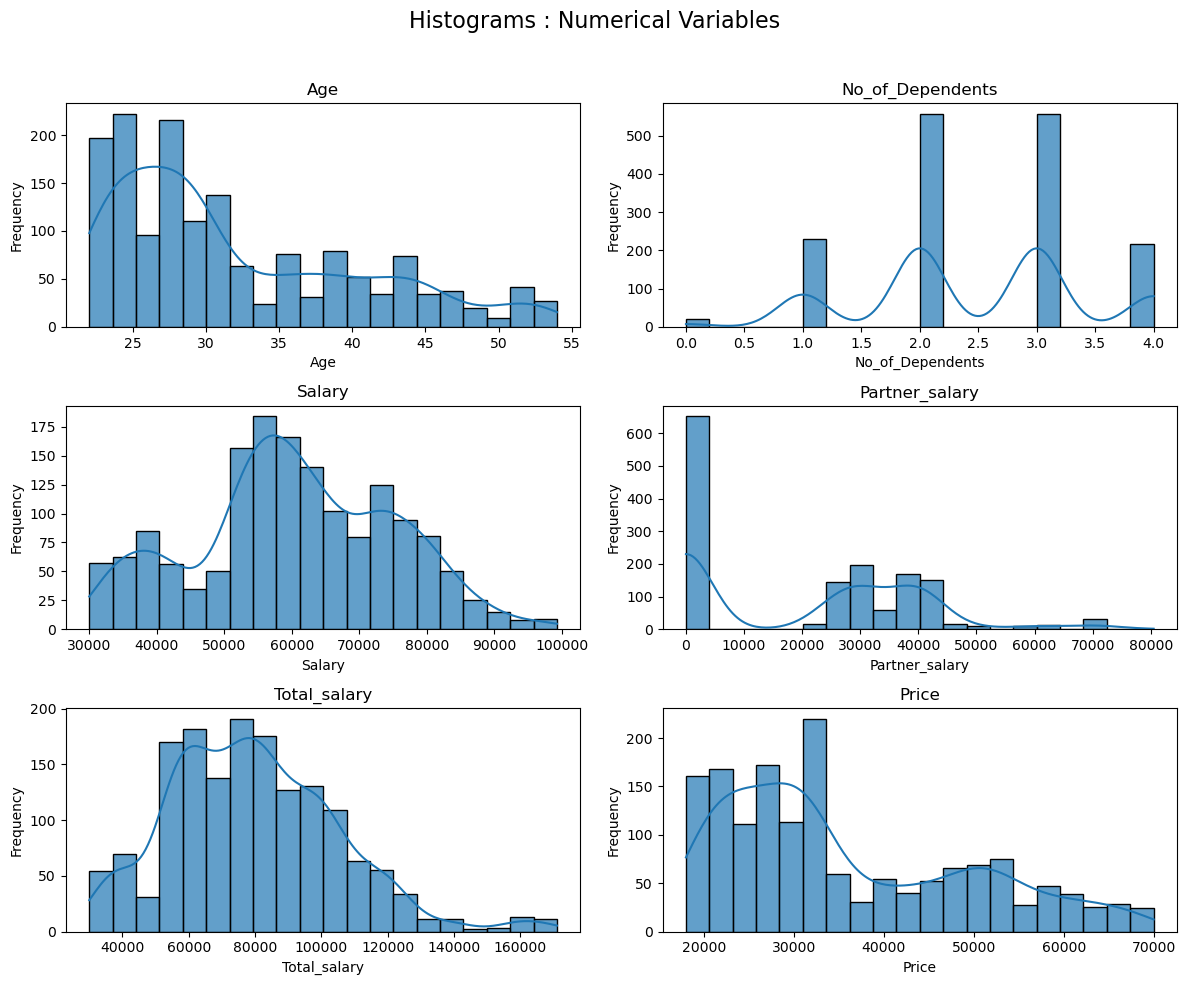

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = data.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))  
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, bins=20, alpha=0.7, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.suptitle("Histograms : Numerical Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

In [20]:
skewness = data[numerical_columns].skew()
numerical_columns = data.select_dtypes(include='number').columns
print("Skewness of Numerical Variables:")
print(skewness)

Skewness of Numerical Variables:
Age                 0.893087
No_of_Dependents   -0.129808
Salary             -0.011571
Partner_salary      0.338255
Total_salary        0.609706
Price               0.740874
dtype: float64


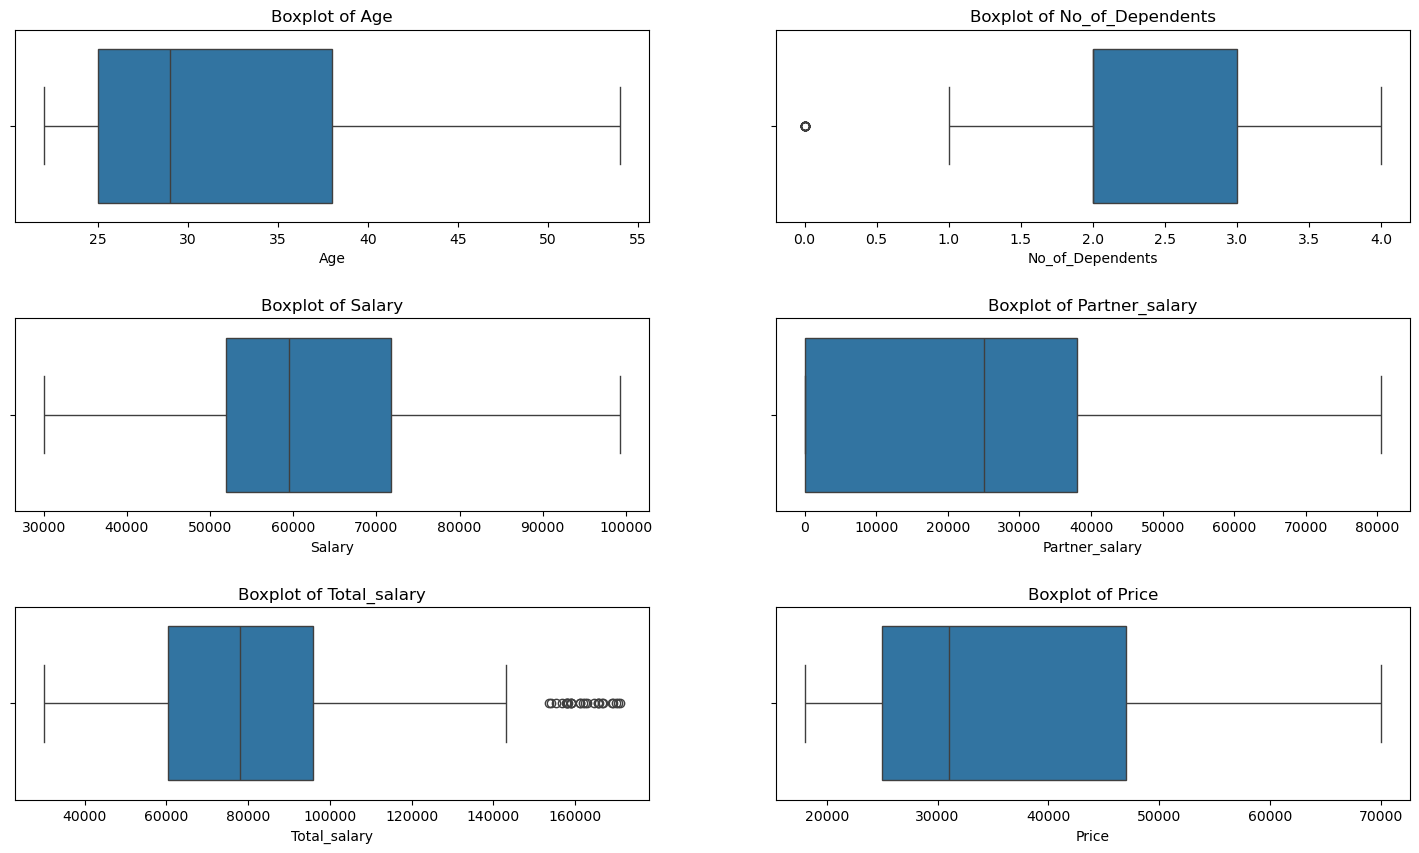

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))  

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], ax=axes[i])  
    axes[i].set_title(f"Boxplot of {col}")  

plt.subplots_adjust(hspace=0.5) 
plt.show()


In [31]:
for col in data.select_dtypes(include='number').columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")
   


Age: 0 outliers detected
No_of_Dependents: 20 outliers detected
Salary: 0 outliers detected
Partner_salary: 0 outliers detected
Total_salary: 27 outliers detected
Price: 0 outliers detected


In [32]:
    Q1 = data["Total_salary"].quantile(0.25)
    Q3 = data["Total_salary"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("Lower_bound for Total_salary :",lower_bound)
    print("Upper_bound for Total_salary :",upper_bound)

    data["Total_salary"] = data["Total_salary"].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    print("Outliers have been treated by capping to IQR bounds.")


Lower_bound for Total_salary : 7400.0
Upper_bound for Total_salary : 149000.0
Outliers have been treated by capping to IQR bounds.


***Categorical Variables***

In [12]:
for col in data.select_dtypes(include='object').columns:
    print(f"Unique values in {col}:")
    print(data[col].value_counts())
    print()

Unique values in Gender:
Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

Unique values in Profession:
Profession
Salaried    896
Business    685
Name: count, dtype: int64

Unique values in Marital_status:
Marital_status
Married    1443
Single      138
Name: count, dtype: int64

Unique values in Education:
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64

Unique values in Personal_loan:
Personal_loan
Yes    792
No     789
Name: count, dtype: int64

Unique values in House_loan:
House_loan
No     1054
Yes     527
Name: count, dtype: int64

Unique values in Partner_working:
Partner_working
Yes    868
No     713
Name: count, dtype: int64

Unique values in Make:
Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64



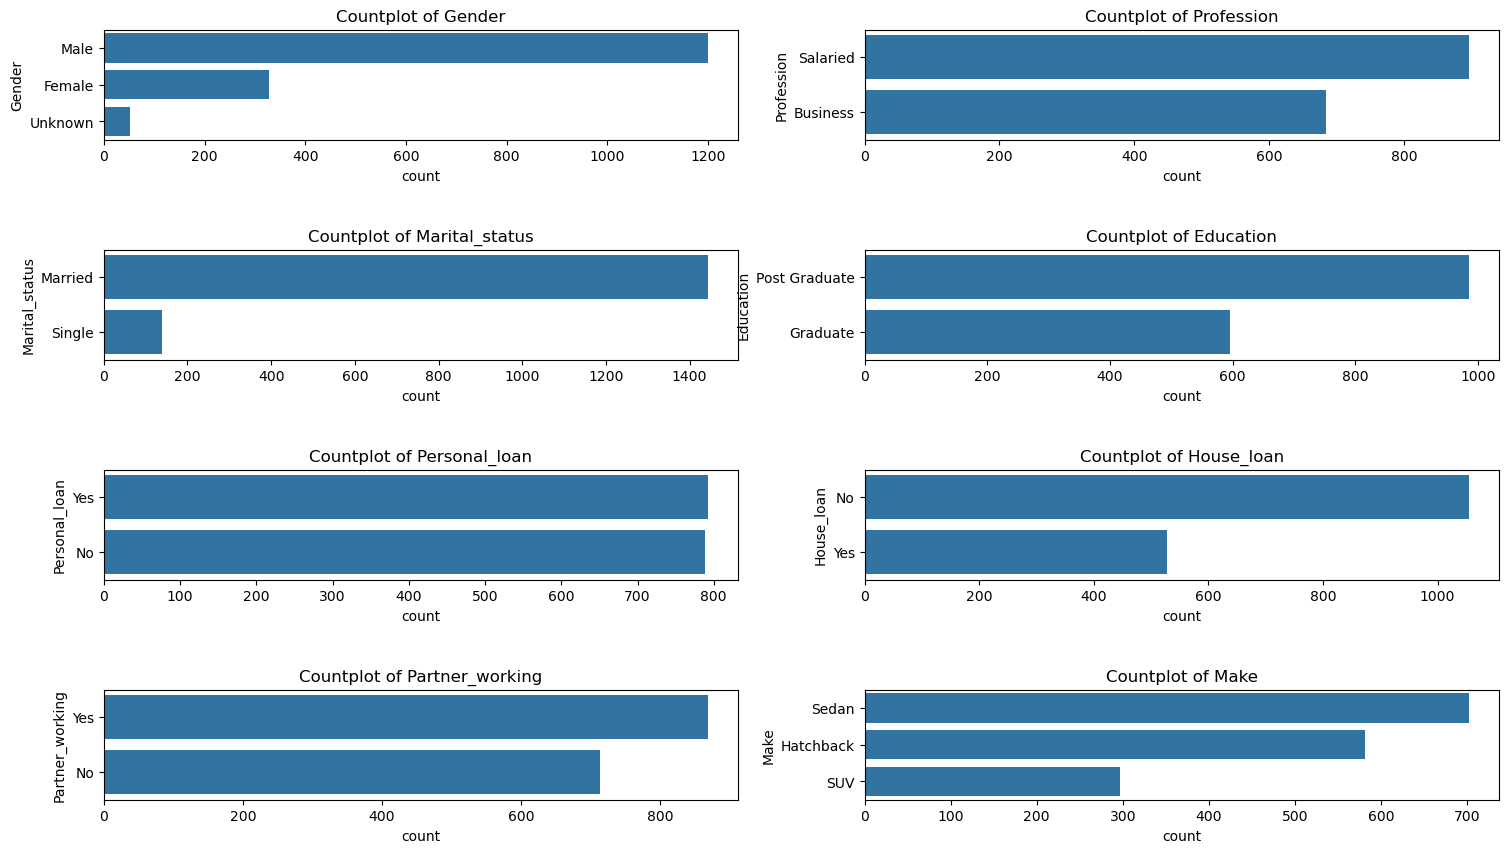

In [35]:
categorical_columns = data.select_dtypes(include='object').columns[:8]  
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,10))  

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(y=data[col], order=data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Countplot of {col}")

plt.subplots_adjust(hspace=1) 
plt.show()

***Observations and insights***

In [37]:
print("Numerical Variables Summary:")
numerical_columns = data.select_dtypes(include='number').columns
numerical_summary = data[numerical_columns].describe()
print(numerical_summary)
print()
print("Categorical Variables Summary:")
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_values = data[col].nunique()
    most_common = data[col].mode()[0]
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print(f"Most Common Value: {most_common}")
    print()

Numerical Variables Summary:
               Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1581.000000   
mean     31.922201          2.457938  60392.220114    19233.776091   
std       8.425978          0.943483  14674.825044    19670.391171   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    25100.000000   
75%      38.000000          3.000000  71800.000000    38100.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79398.545225  35597.722960  
std     24849.147996  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    149000.000000  70000.000000  

Catego

# Bivariate Analysis

***Relationship between all numerical variables***

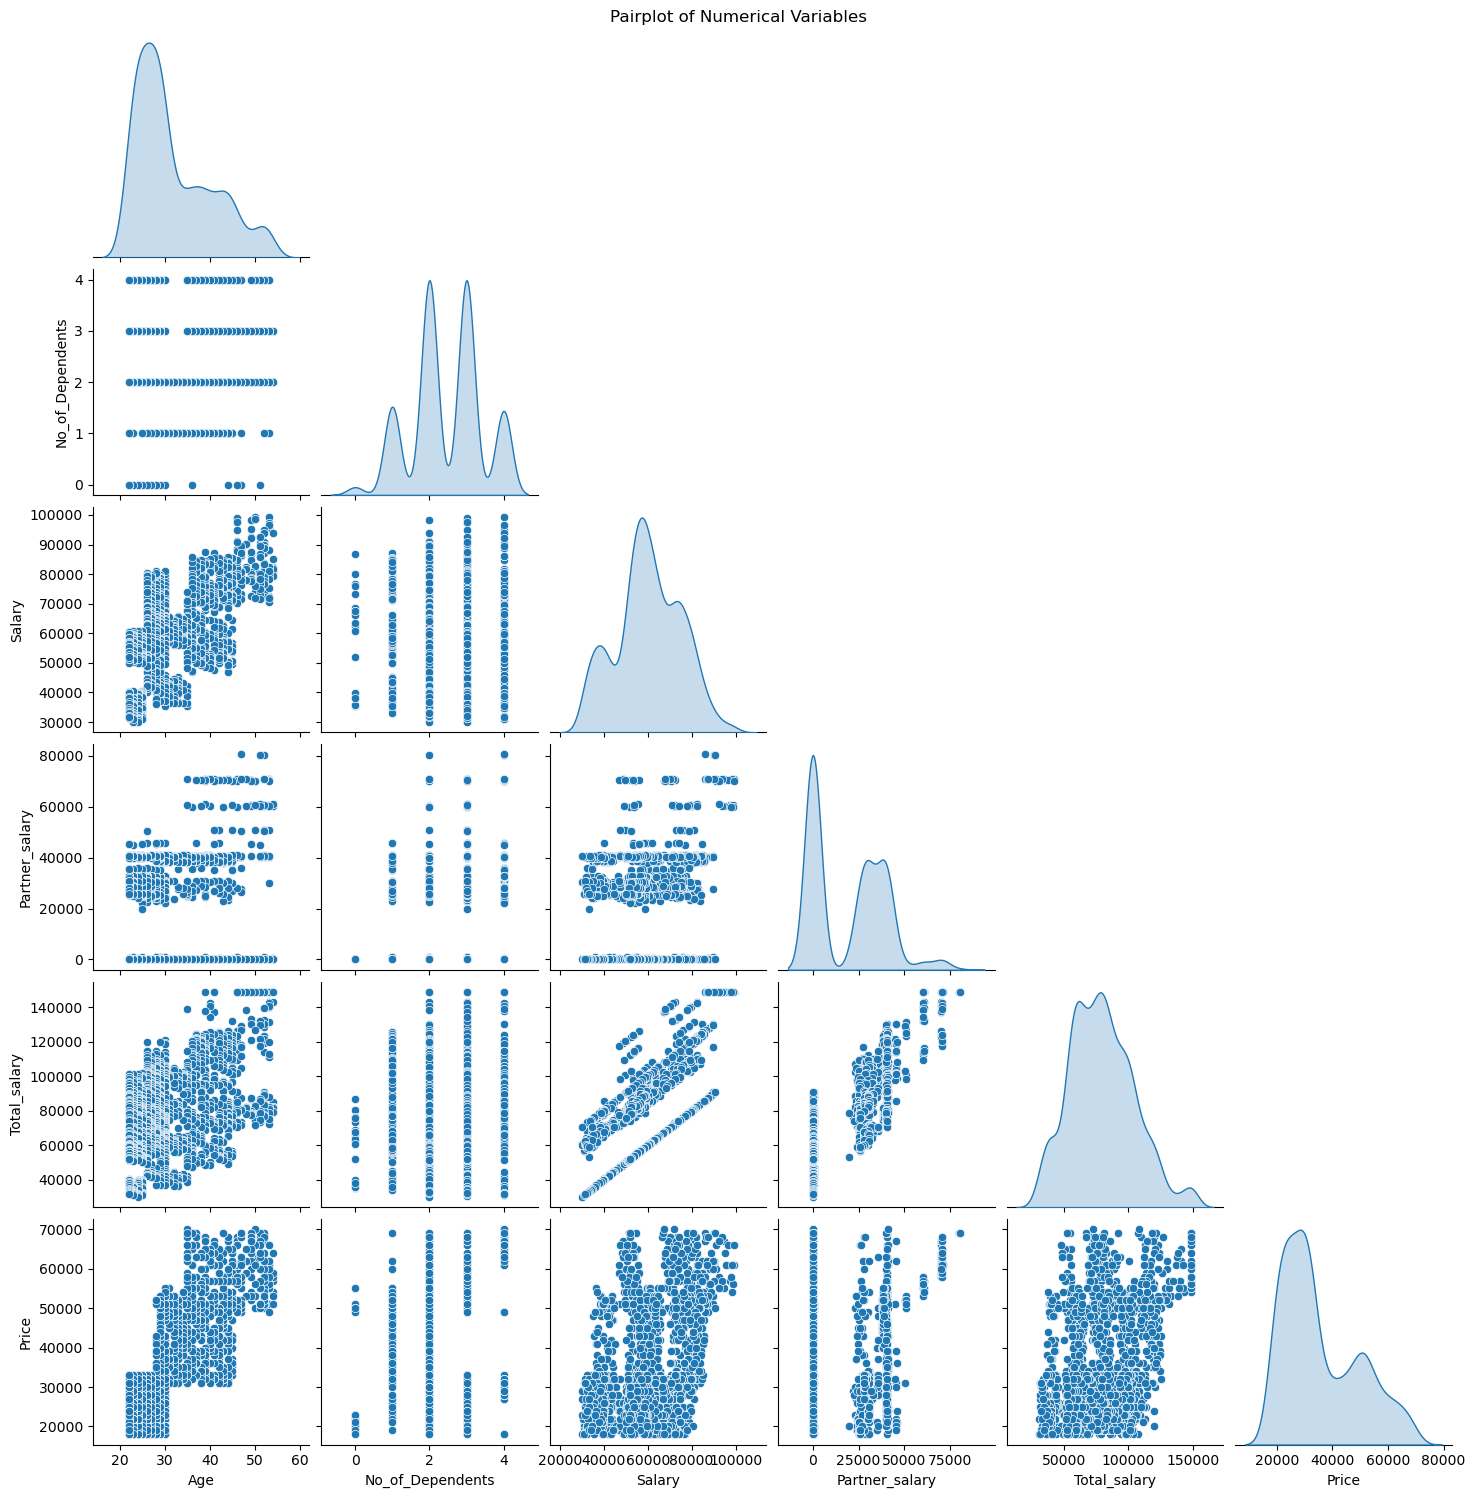

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data.select_dtypes(include='number'),corner=True,diag_kind="kde")
plt.suptitle("Pairplot of Numerical Variables", y=1.0)
plt.show()


***Correlation between all numerical variables***

In [42]:
numerical_data = data.select_dtypes(include='number')
correlation_matrix = numerical_data.corr()
correlation_matrix


,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.189614,0.616899,0.135702,0.452844,0.797831
No_of_Dependents,-0.189614,1.000000,-0.031746,0.144320,0.087606,-0.135839
Salary,0.616899,-0.031746,1.000000,0.087155,0.638625,0.409920
Partner_salary,0.135702,0.144320,0.087155,1.000000,0.819248,0.171875
Total_salary,0.452844,0.087606,0.638625,0.819248,1.000000,0.359651
Price,0.797831,-0.135839,0.409920,0.171875,0.359651,1.000000


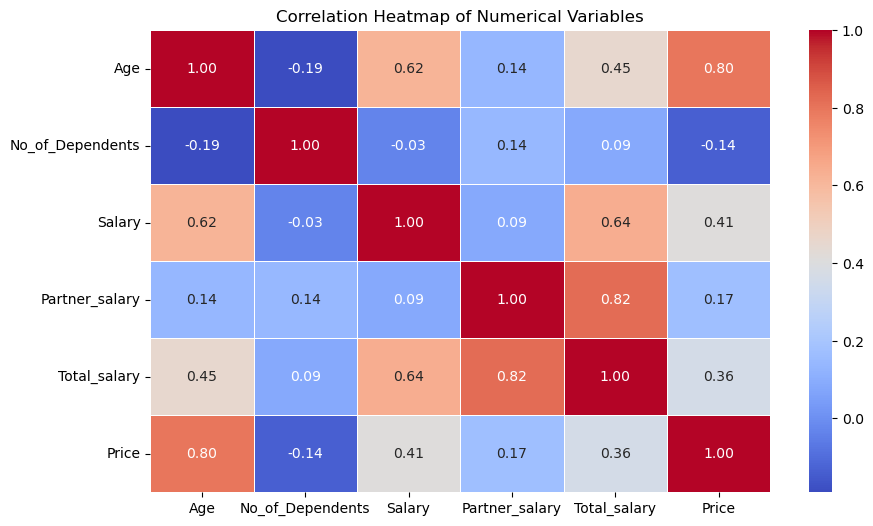

In [43]:
plt.figure(figsize=(10, 6))  
sns.heatmap(
    correlation_matrix,
    annot=True,          
    cmap='coolwarm',     
    fmt='.2f',           
    linewidths=0.5,      
    cbar=True          
)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


***Relationship between categorical vs numerical variables***

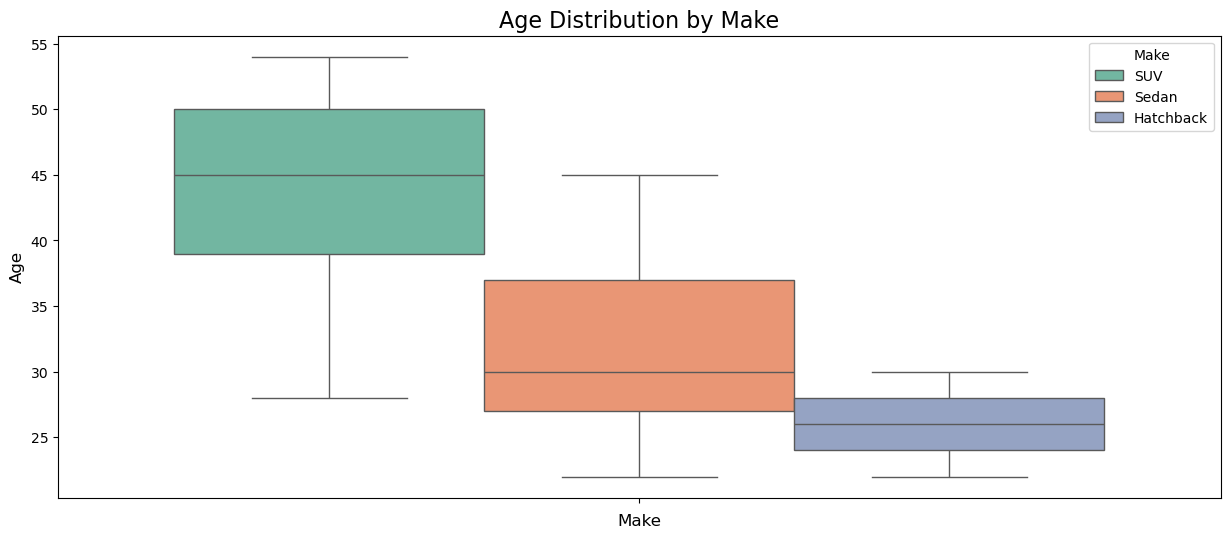

In [114]:
categorical_columns = data.select_dtypes(include='object').columns
plt.figure(figsize=(15, 6))
sns.boxplot(hue='Make', y='Age', data=data,palette="Set2")
plt.title('Age Distribution by Make', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

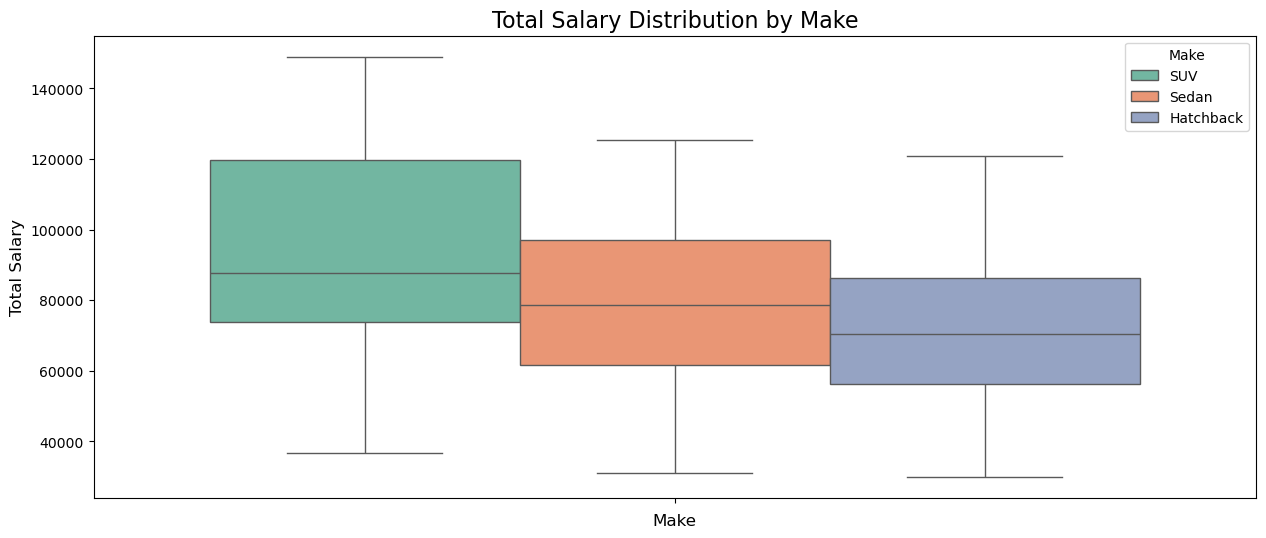

In [46]:
plt.figure(figsize=(15, 6))
sns.boxplot(hue='Make', y='Total_salary', data=data,palette="Set2")
plt.title('Total Salary Distribution by Make', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Total Salary', fontsize=12)
plt.show()

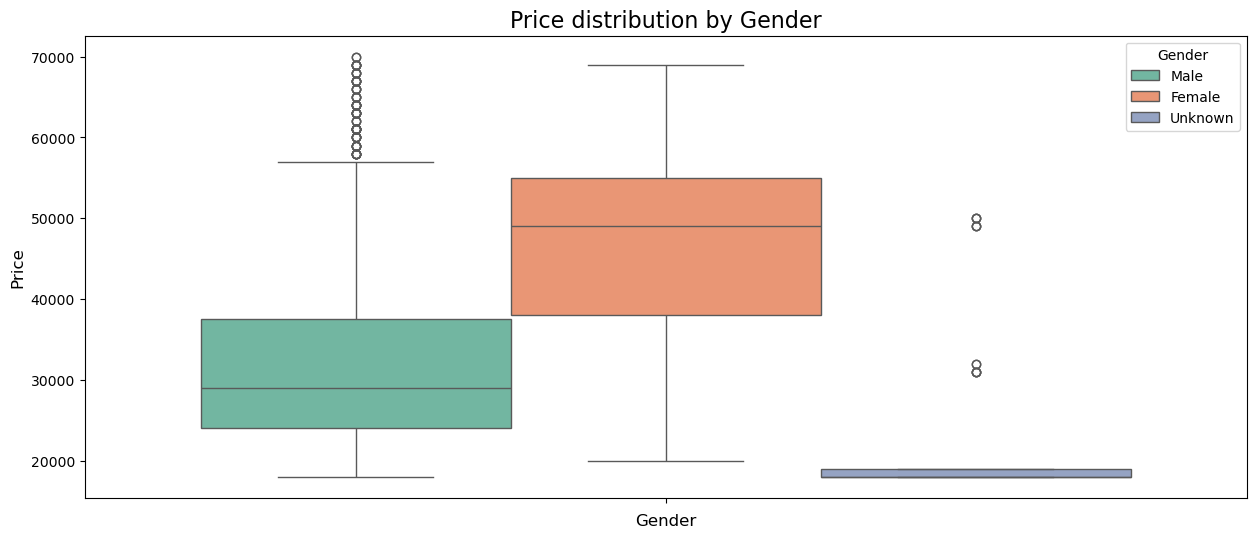

In [47]:
plt.figure(figsize=(15, 6))
sns.boxplot(hue='Gender', y='Price', data=data,palette="Set2")
plt.title('Price distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

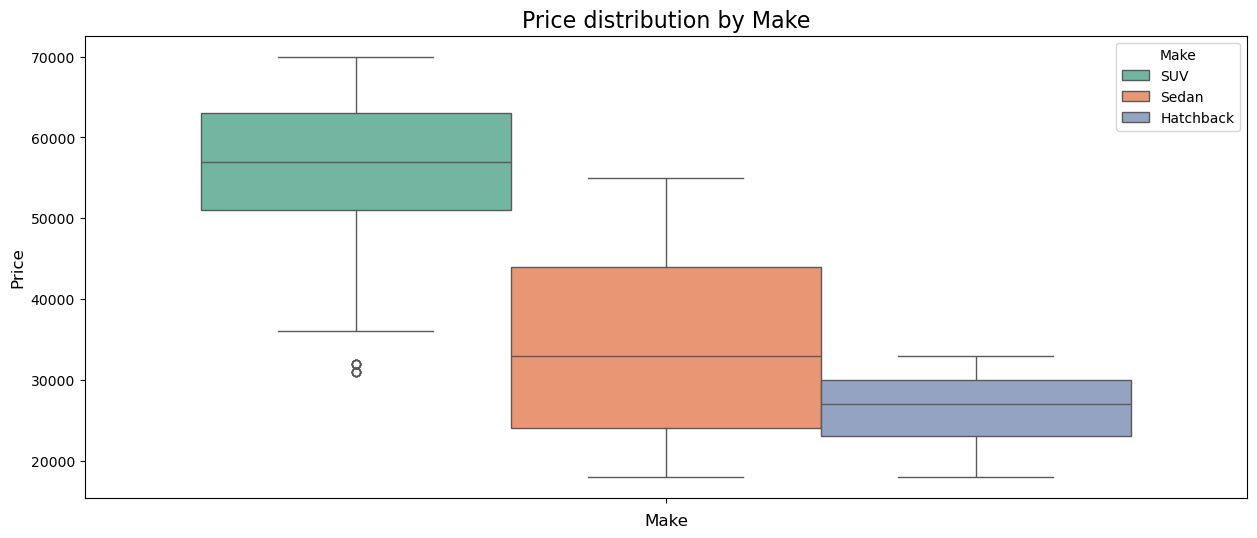

In [48]:
plt.figure(figsize=(15, 6))
sns.boxplot(hue='Make', y='Price', data=data,palette="Set2")
plt.title('Price distribution by Make', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

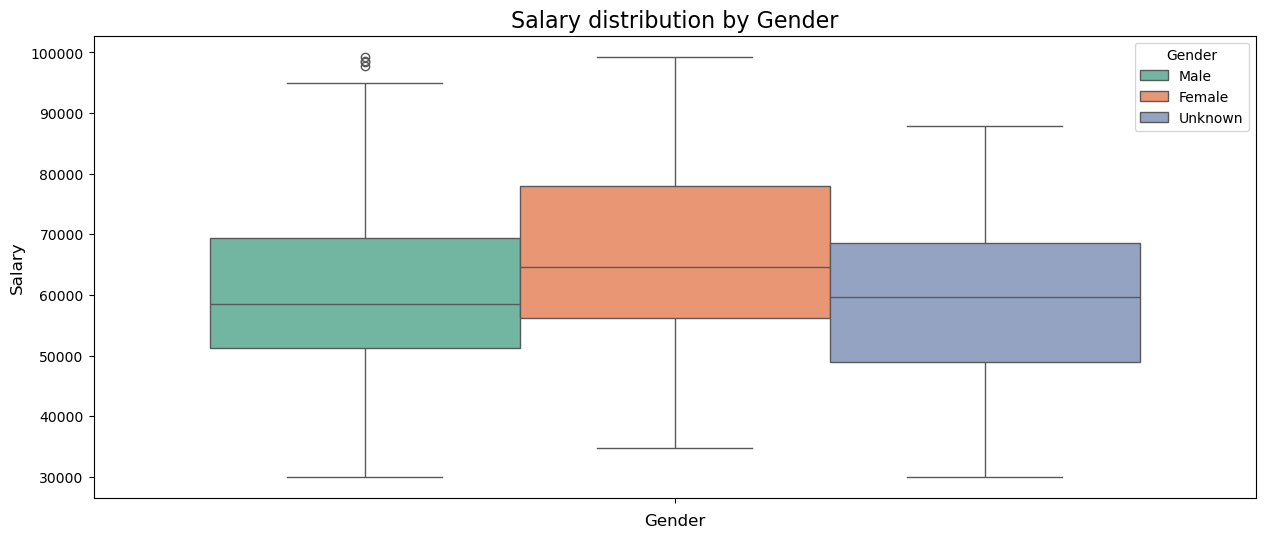

In [49]:
plt.figure(figsize=(15, 6))
sns.boxplot(hue='Gender', y='Salary', data=data,palette="Set2")
plt.title('Salary distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

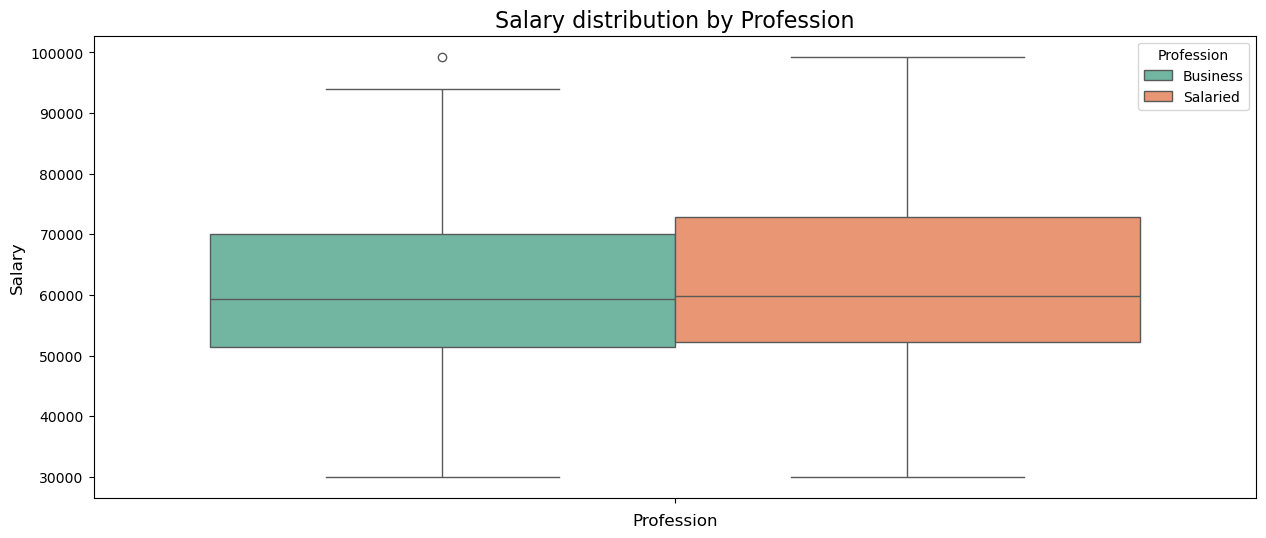

In [50]:
plt.figure(figsize=(15, 6))
sns.boxplot(hue='Profession', y='Salary', data=data,palette="Set2")
plt.title('Salary distribution by Profession', fontsize=16)
plt.xlabel('Profession', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

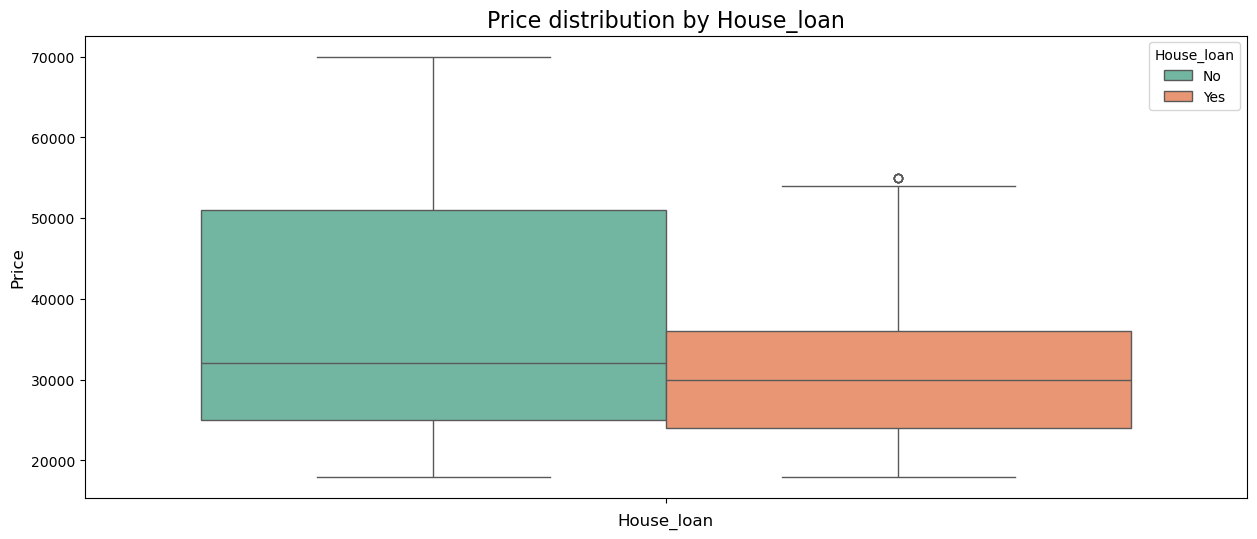

In [51]:
plt.figure(figsize=(15, 6))
sns.boxplot(hue='House_loan', y='Price', data=data,palette="Set2")
plt.title('Price distribution by House_loan', fontsize=16)
plt.xlabel('House_loan', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

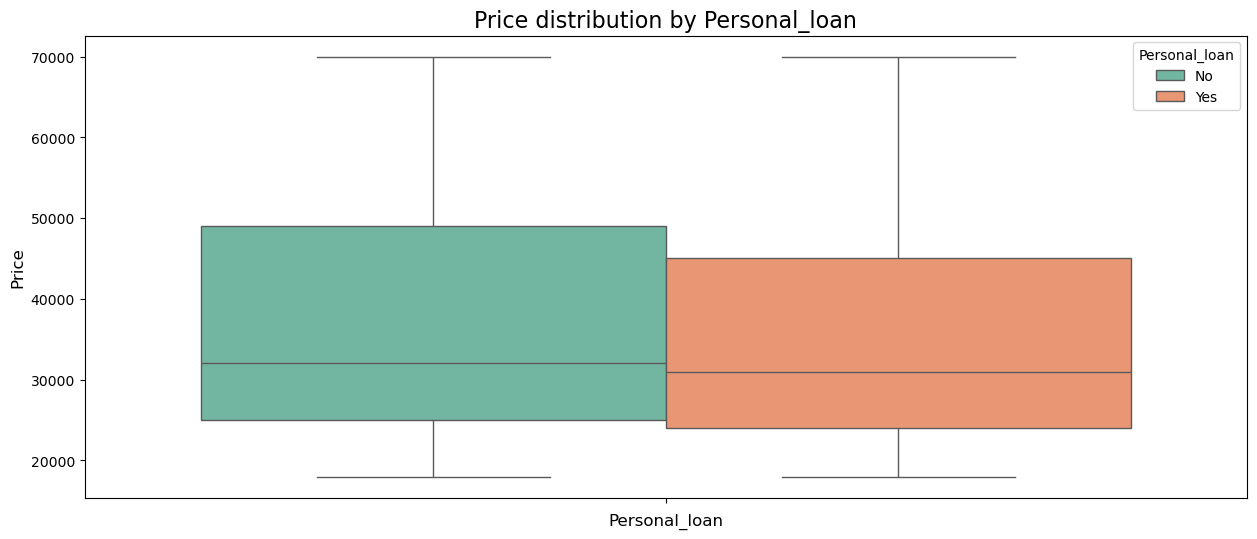

In [52]:
plt.figure(figsize=(15, 6))
sns.boxplot(hue='Personal_loan', y='Price', data=data,palette="Set2")
plt.title('Price distribution by Personal_loan', fontsize=16)
plt.xlabel('Personal_loan', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

<Figure size 1500x600 with 0 Axes>

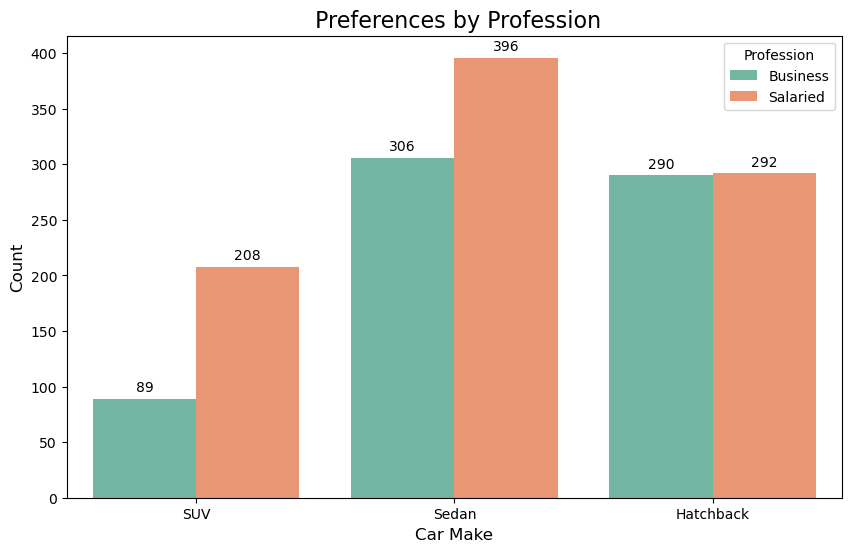

In [53]:
plt.figure(figsize=(15, 6))
plt.figure(figsize=(10, 6))
sns.countplot(x='Make', hue='Profession', data=data, palette='Set2')
plt.title(" Preferences by Profession", fontsize=16)
plt.xlabel("Car Make", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Profession", fontsize=10)
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.show()

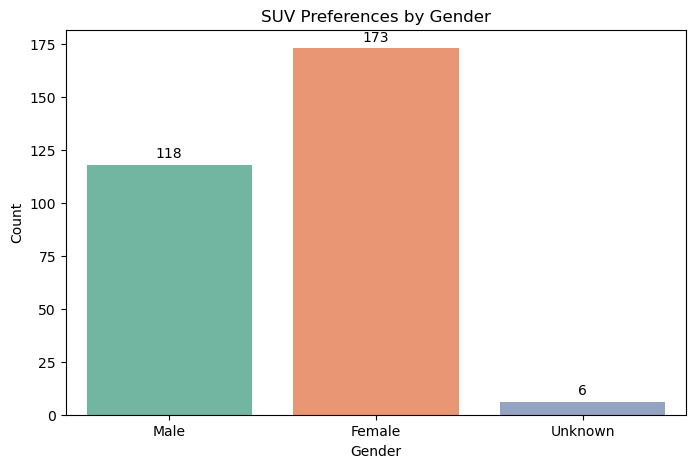

In [54]:
suv_data = data[data['Make'] == 'SUV']

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=suv_data,hue='Gender',palette='Set2')
plt.title("SUV Preferences by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.show()


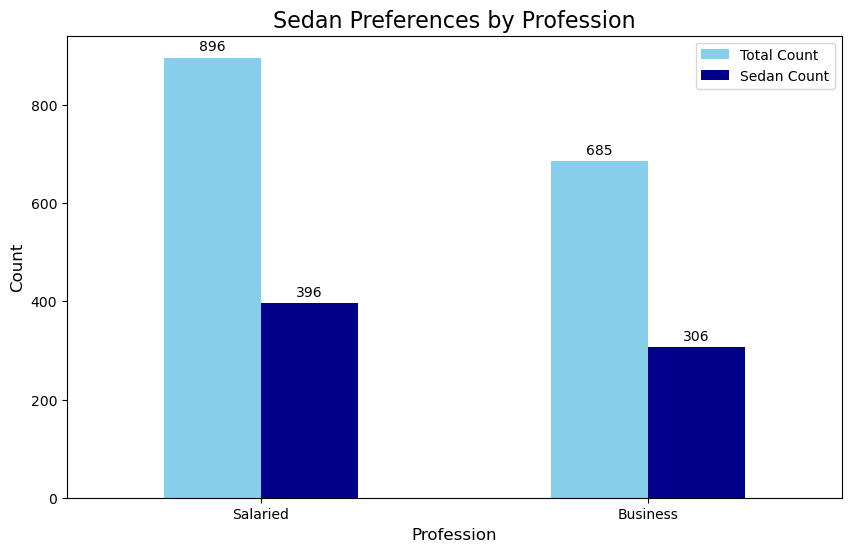

In [55]:
profession_summary = pd.DataFrame({
    'Total': data['Profession'].value_counts(),
    'Sedan':data[data['Make'] == 'Sedan']['Profession'].value_counts()
}).fillna(0) 

profession_summary.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'darkblue'])

plt.title("Sedan Preferences by Profession", fontsize=16)
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(['Total Count', 'Sedan Count'], fontsize=10)
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.show()


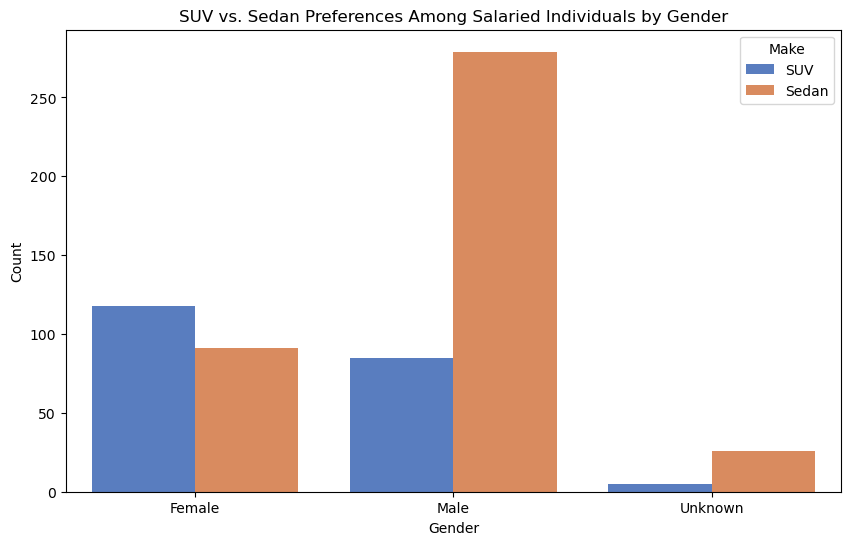

In [56]:
salaried_data = data[data['Profession'] == 'Salaried']
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Make', data=salaried_data[salaried_data['Make'].isin(['SUV', 'Sedan'])], palette='muted')
plt.title("SUV vs. Sedan Preferences Among Salaried Individuals by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


               count          mean           std      min      25%      50%  \
Personal_loan                                                                 
No             789.0  36742.712294  14534.344526  18000.0  25000.0  32000.0   
Yes            792.0  34457.070707  12578.780338  18000.0  24000.0  31000.0   

                   75%      max  
Personal_loan                    
No             49000.0  70000.0  
Yes            45000.0  70000.0  


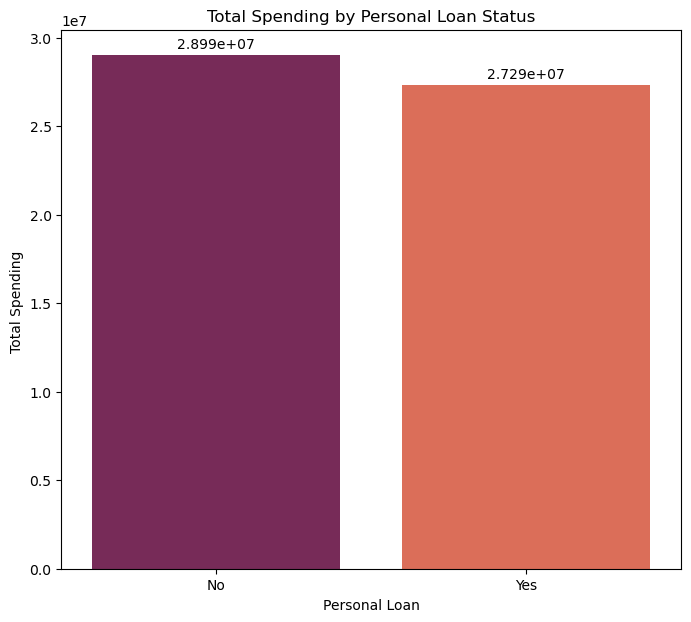

In [57]:
print(data.groupby('Personal_loan')['Price'].describe())
total_spending = data.groupby('Personal_loan')['Price'].sum()

plt.figure(figsize=(8, 7))
sns.barplot(x=total_spending.index, y=total_spending.values, palette='rocket',hue=total_spending.index)
plt.title("Total Spending by Personal Loan Status")
plt.xlabel("Personal Loan")
plt.ylabel("Total Spending ")
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.show()


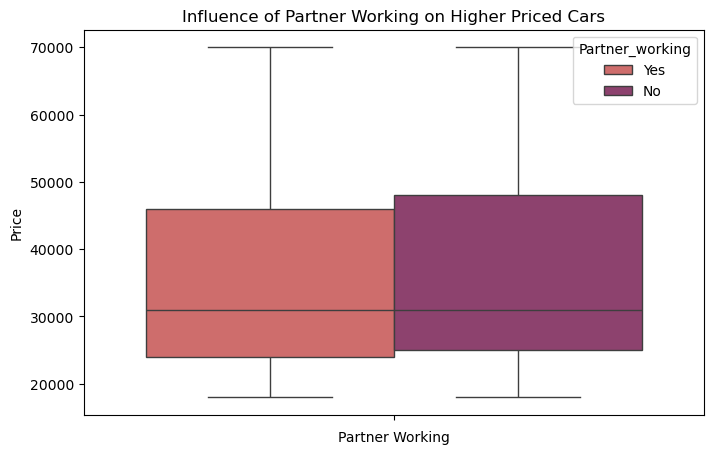

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(hue='Partner_working', y='Price', data=data, palette='flare')
plt.title("Influence of Partner Working on Higher Priced Cars")
plt.xlabel("Partner Working")
plt.ylabel("Price")
plt.show()
